In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./India_automobile_buying_behaviour.csv")

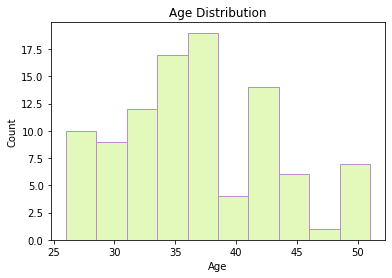

In [5]:
# based on Age
sns.histplot(data=df, x='Age', bins=10,color='#DAF7A6', edgecolor='#BB8FCE')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [6]:
# we can see age-group 32-38 are buying EVs more after setting up there life i think

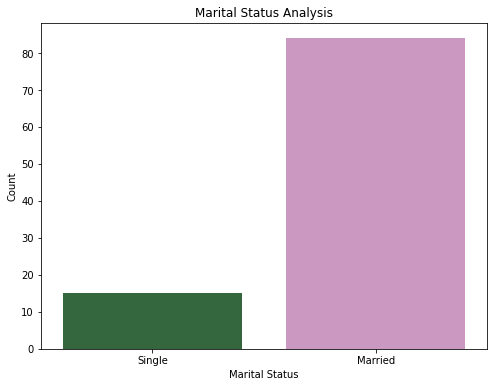

In [14]:
# based on marital status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Marrital Status',palette="cubehelix")
plt.title('Marital Status Analysis')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

In [15]:
#ofc

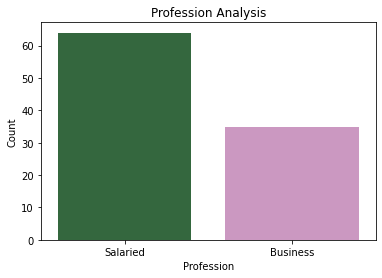

In [16]:
# based on profession:-

sns.countplot(data=df, x='Profession',palette="cubehelix")
plt.title('Profession Analysis')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.show()


In [17]:
#wisdom of crowd ofc 

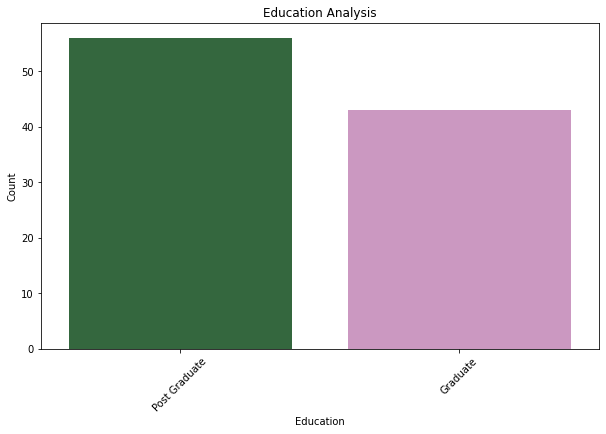

In [18]:
# baed in ed
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education',palette="cubehelix")
plt.title('Education Analysis')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [19]:
#again ofc its india...

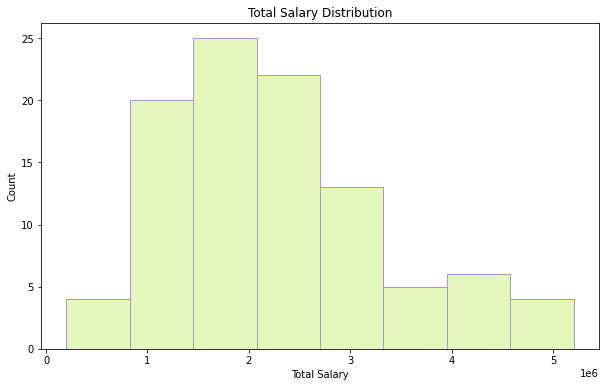

In [23]:
#Total Salary Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total Salary', bins=8,color='#DAF7A6', edgecolor='#BB8FCE')
plt.title('Total Salary Distribution')
plt.xlabel('Total Salary')
plt.ylabel('Count')
plt.show()

In [24]:
#what xd

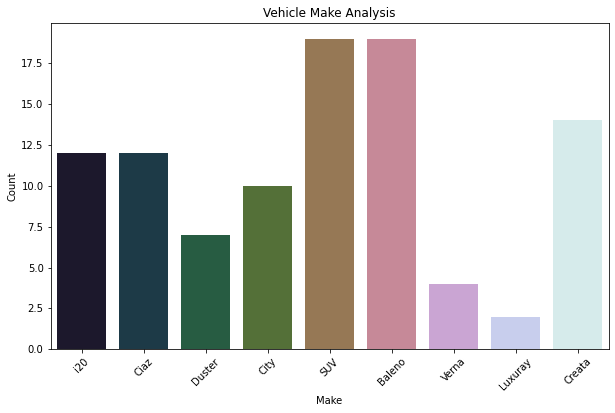

In [26]:
#Vehicle Make Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Make',palette="cubehelix")
plt.title('Vehicle Make Analysis')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [27]:
#baleno and suv it is huh

In [28]:
df['Car Spending %'] = (df['Price'] / df['Total Salary']) * 100

In [29]:
df

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Car Spending %
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,100.000000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,50.000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,66.666667
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,54.545455
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,61.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000,66.666667
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000,31.372549
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000,50.000000
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000,37.500000


In [30]:
#we should remove the people who spend too much on cars considering them as outliers 

In [31]:
outliers = df['Car Spending %'].idxmax()
df = df.drop(outliers)

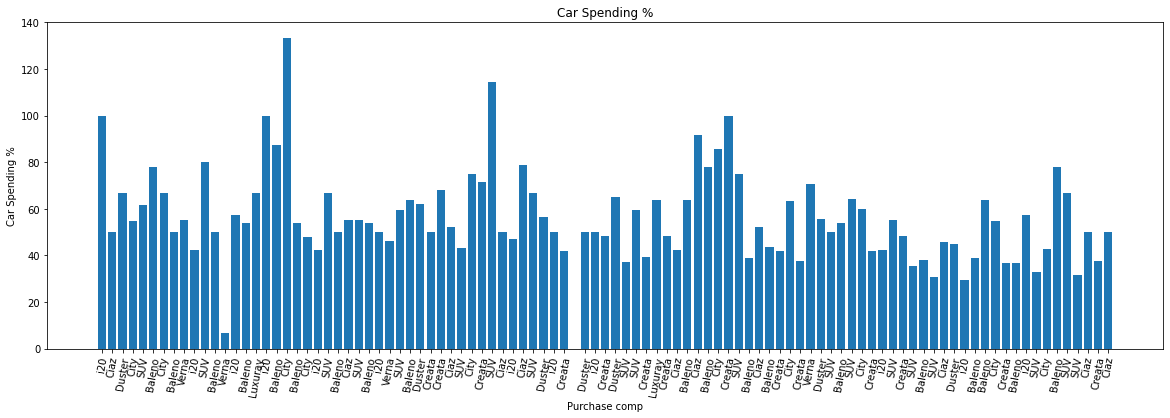

In [38]:
plt.figure(figsize=(20, 6))
plt.bar(df.index, df['Car Spending %'])
plt.title('Car Spending %')
plt.xlabel('Purchase comp')
plt.ylabel('Car Spending %')
plt.xticks(df.index, df['Make'], rotation=80)
plt.show()

<Figure size 720x432 with 0 Axes>

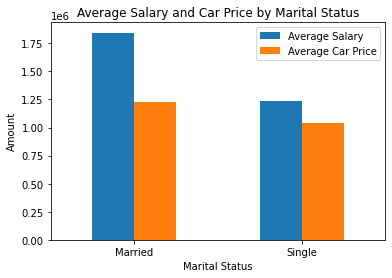

In [40]:
#I think grouping on the basis of maritial status is good 

grouped_df = df.groupby('Marrital Status').agg({'Salary': 'mean', 'Price': 'mean'})
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar')
plt.title('Average Salary and Car Price by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Amount')
plt.legend(['Average Salary', 'Average Car Price'])
plt.xticks(rotation=0)
plt.show()


In [42]:
def salaryf(x, pos):
    return '₹{:,.0f}'.format(x)

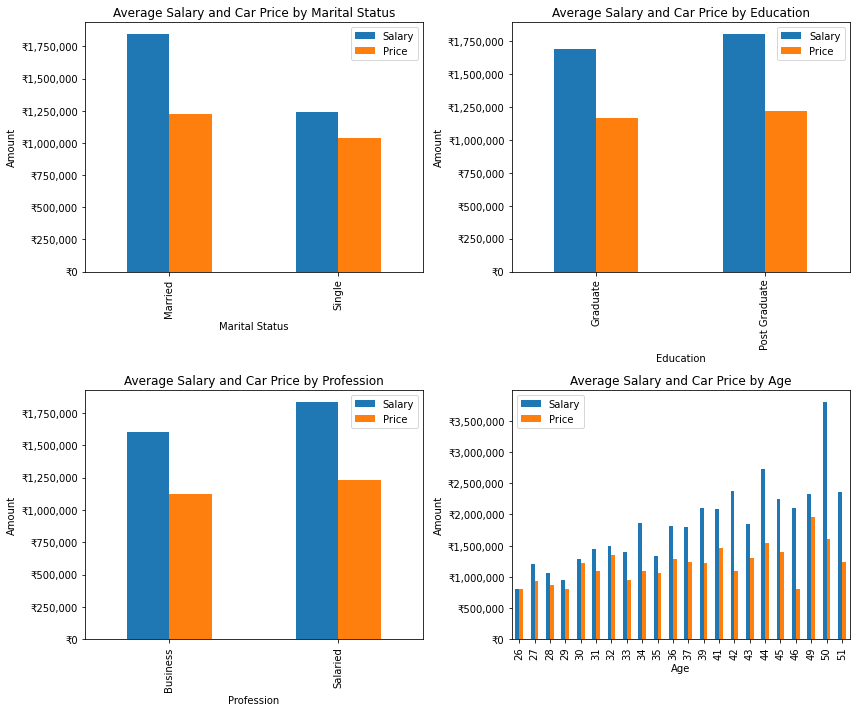

In [48]:
# for every factor
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

def salary_formatter(x, pos):
    return '₹{:,.0f}'.format(x)

# Maritial Stat
grouped_marital = df.groupby('Marrital Status').agg({'Salary': 'mean', 'Price': 'mean'})
grouped_marital.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Average Salary and Car Price by Marital Status')
axes[0, 0].set_xlabel('Marital Status')
axes[0, 0].set_ylabel('Amount')
axes[0, 0].yaxis.set_major_formatter(salary_formatter)

# Ed
grouped_education = df.groupby('Education').agg({'Salary': 'mean', 'Price': 'mean'})
grouped_education.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Average Salary and Car Price by Education')
axes[0, 1].set_xlabel('Education')
axes[0, 1].set_ylabel('Amount')
axes[0, 1].yaxis.set_major_formatter(salary_formatter)

# prof
grouped_profession = df.groupby('Profession').agg({'Salary': 'mean', 'Price': 'mean'})
grouped_profession.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Average Salary and Car Price by Profession')
axes[1, 0].set_xlabel('Profession')
axes[1, 0].set_ylabel('Amount')
axes[1, 0].yaxis.set_major_formatter(salary_formatter)

# age
grouped_age = df.groupby('Age').agg({'Salary': 'mean', 'Price': 'mean'})
grouped_age.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Average Salary and Car Price by Age')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Amount')
axes[1, 1].yaxis.set_major_formatter(salary_formatter)

plt.tight_layout()
plt.show()